## Titanic Project
### Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 
 
### Attributes meaning-
1. survival: Survival	(0 = No, 1 = Yes)
2. pclass: Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex:	Sex	
4. Age:	Age in years	
5. sibsp:	# of siblings / spouses aboard the Titanic	
6. parch:	# of parents / children aboard the Titanic	
7. ticket:	Ticket number	
8. fare:	Passenger fare	
9. cabin:	Cabin number	
10. embarked:	Port of Embarkation	 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, plot_roc_curve

In [6]:
#get the dataset into dataframe
df = pd.read_csv("titanic_train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#checking the rows and columns
df.shape

(891, 12)

In [8]:
#checking for information of independent variables
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#missing values can be visualized using graphs
sns.heatmap(df.isnull())

In [10]:
#checking the data statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
print(df['Sex'].unique())

print(df['Embarked'].unique())

print(df['Cabin'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [13]:
print("Embarked: \n",df['Embarked'].value_counts())
print("Sex: \n",df['Sex'].value_counts())
print("Survived: \n",df['Survived'].value_counts())

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64
Sex: 
 male      577
female    314
Name: Sex, dtype: int64
Survived: 
 0    549
1    342
Name: Survived, dtype: int64


In [14]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)

In [42]:
df['Embarked'].fillna(method='ffill',inplace = True) 
df['SibSp'].fillna(method='ffill',inplace = True) 
df['Parch'].fillna(method='ffill',inplace = True) 

In [43]:
label_enc = LabelEncoder()
df['Embarked'] = pd.Series(label_enc.fit_transform(df['Embarked']))

In [44]:
df['Embarked'].value_counts()

2    644
0    169
1     78
Name: Embarked, dtype: int64

In [45]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [46]:
X = df.drop(columns=['Ticket','Cabin','Name','PassengerId', 'Survived','SibSp','Parch'])
y = df['Survived']

X

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2
...,...,...,...,...,...
886,2,1,27.0,13.0000,2
887,1,0,19.0,30.0000,2
888,3,0,NaN,23.4500,2
889,1,1,26.0,30.0000,0


In [47]:
knn_imp = KNNImputer()
X = pd.DataFrame(knn_imp.fit_transform(X),columns=X.columns)

In [48]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

Pclass     -0.338481
Sex        -0.543351
Age        -0.092538
Fare        0.257307
Embarked   -0.172726
dtype: float64


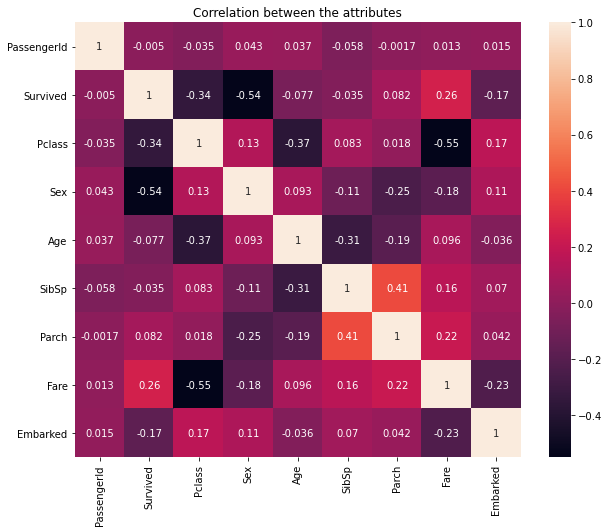

In [49]:
print(X.corrwith(y))
corr = df.corr()
plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(corr,annot=True)
plt.title("Correlation between the attributes")
plt.show()

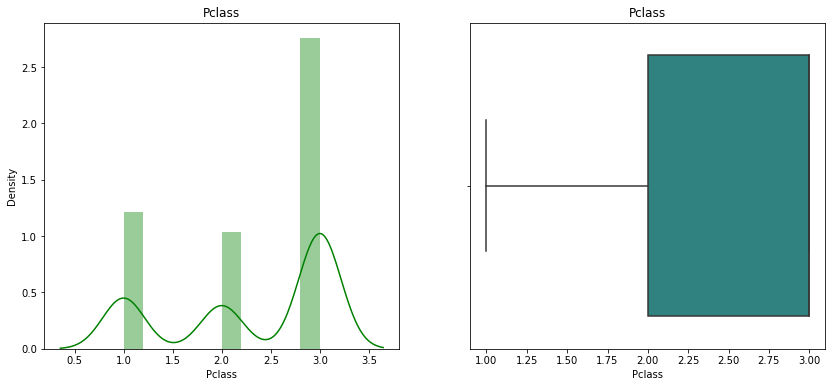

In [23]:
plt.figure(figsize=(14,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.distplot(X['Pclass'],color='g')
plt.title("Pclass")

ax = plt.subplot(1,2,2)
sns.boxplot(X['Pclass'], palette='viridis_r')
plt.title("Pclass")


plt.show()

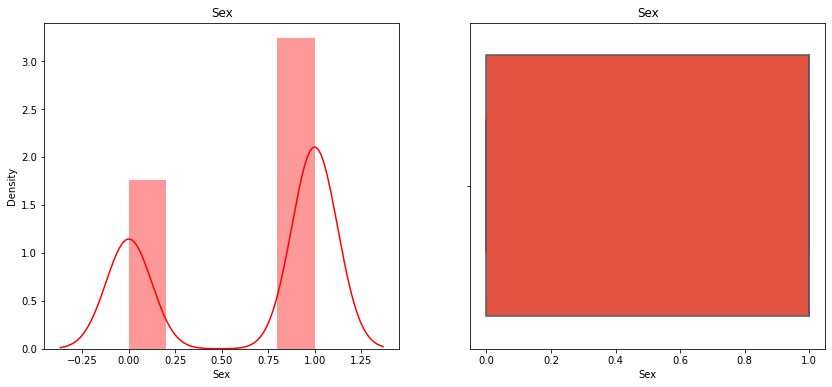

In [24]:
plt.figure(figsize=(14,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.distplot(X['Sex'],color='r')
plt.title("Sex")

ax = plt.subplot(1,2,2)
sns.boxplot(X['Sex'],palette='CMRmap_r')
plt.title("Sex")


plt.show()

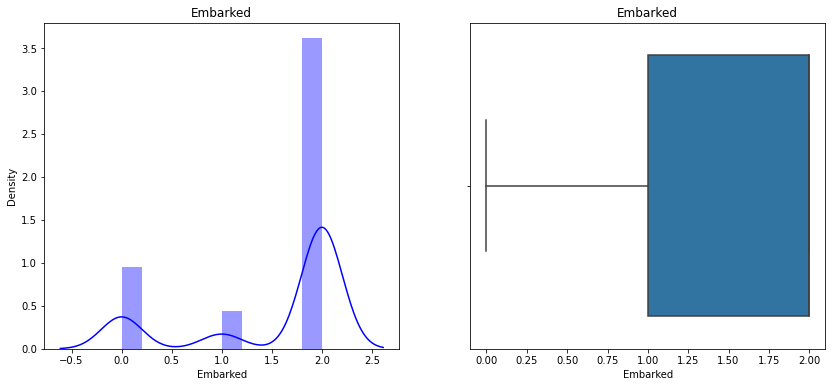

In [25]:
plt.figure(figsize=(14,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.distplot(X['Embarked'],color='b')
plt.title("Embarked")

ax = plt.subplot(1,2,2)
sns.boxplot(X['Embarked'])
plt.title("Embarked")


plt.show() 

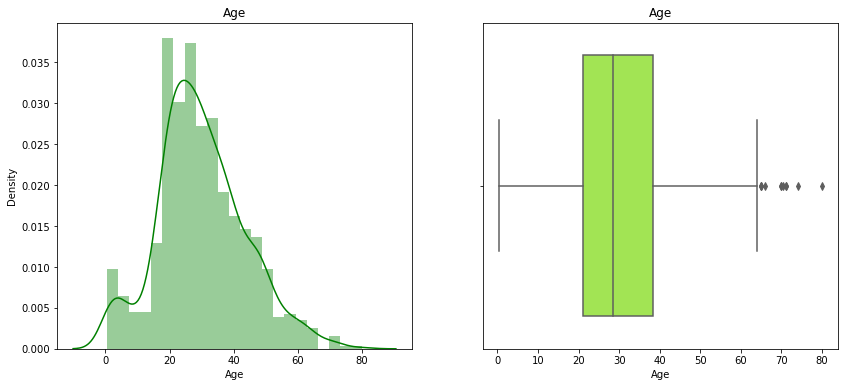

In [26]:
plt.figure(figsize=(14,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.distplot(X['Age'], color='Green')
plt.title("Age")

ax = plt.subplot(1,2,2)
sns.boxplot(X['Age'],palette='turbo')
plt.title("Age")


plt.show()
 

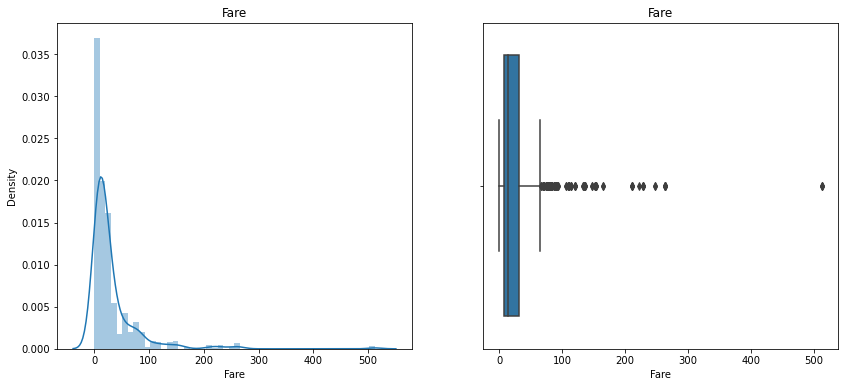

In [27]:
plt.figure(figsize=(14,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.distplot(X['Fare'])
plt.title("Fare")

ax = plt.subplot(1,2,2)
sns.boxplot(X['Fare'])
plt.title("Fare")


plt.show()
 

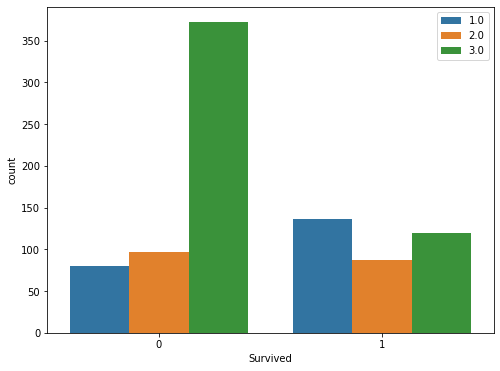

In [28]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(y,hue=X['Pclass'],)
plt.legend()
plt.show()

Based on the above graph we can see that, most of people class 3 did not survive from the incident.

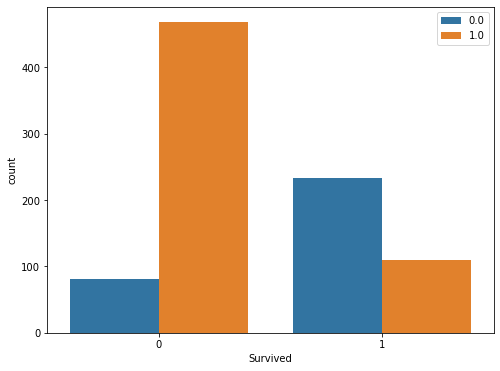

In [29]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(y,hue=X['Sex'])
plt.legend()
plt.show()

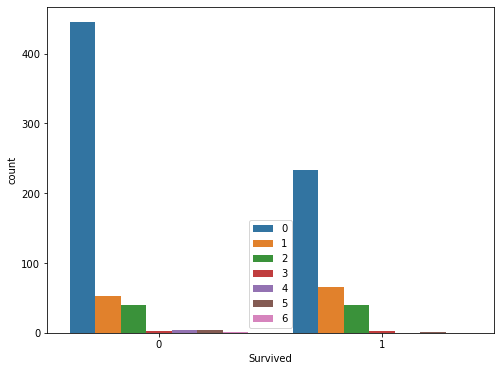

In [31]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(y,hue=df['Parch'])
plt.legend()
plt.show()

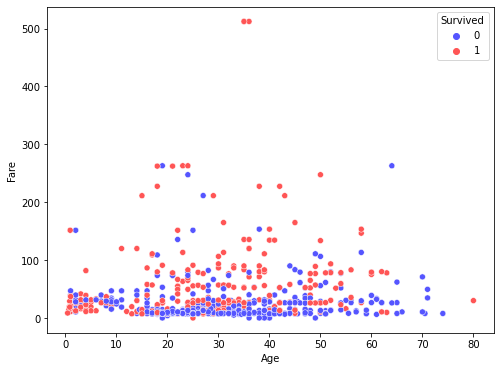

In [32]:
plt.figure(figsize=(8,6), facecolor='white')
sns.scatterplot(x ='Age', y ='Fare', hue='Survived',data=df,palette='seismic')
plt.show()

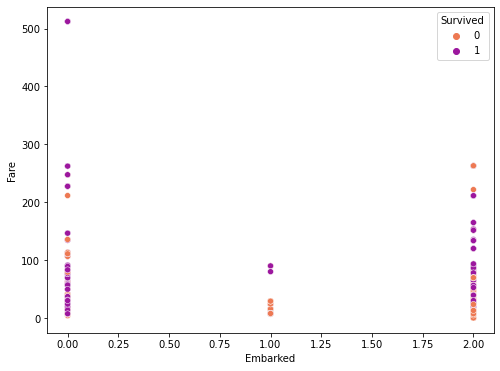

In [33]:
plt.figure(figsize=(8,6), facecolor='white')
sns.scatterplot(x ='Embarked', y ='Fare', hue='Survived',data=df,palette='plasma_r')
plt.show()

In [36]:
X['Fare']=np.log(X['Fare'])

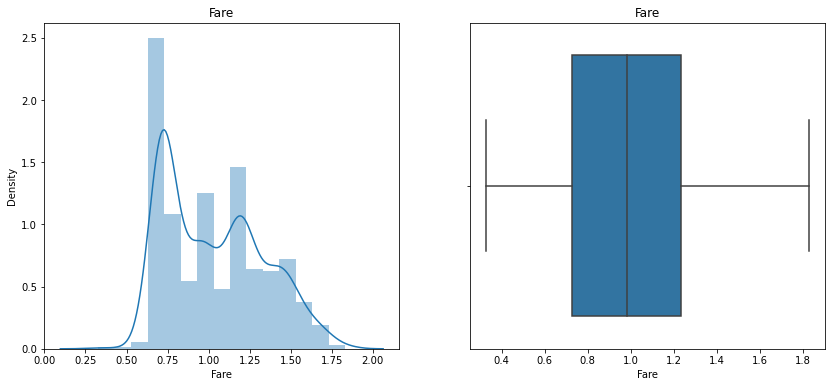

In [37]:
plt.figure(figsize=(14,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.distplot(X['Fare'])
plt.title("Fare")

ax = plt.subplot(1,2,2)
sns.boxplot(X['Fare'])
plt.title("Fare")


plt.show()
 

In [50]:
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=64)

## MODEL Building

### 1. Logistic Regression

In [52]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(Log_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.7964743589743589

 The CV score of Model : 0.7823899371069183

 The confusion Matrix :
  [[324  55]
 [ 72 173]]

 The classification report:
                precision    recall  f1-score   support

           0       0.82      0.85      0.84       379
           1       0.76      0.71      0.73       245

    accuracy                           0.80       624
   macro avg       0.79      0.78      0.78       624
weighted avg       0.79      0.80      0.80       624

*******************************************


### 2 KNN Classifier

In [53]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)
y_pred = KNN_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))

CV=cross_val_score(KNN_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.6698717948717948

 The CV score of Model : 0.7041928721174003

 The confusion Matrix :
  [[306  73]
 [133 112]]

 The classification report:
                precision    recall  f1-score   support

           0       0.70      0.81      0.75       379
           1       0.61      0.46      0.52       245

    accuracy                           0.67       624
   macro avg       0.65      0.63      0.63       624
weighted avg       0.66      0.67      0.66       624

*******************************************


### 3. Random Forest Classifier

In [54]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))

CV=cross_val_score(RF_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.7916666666666666

 The CV score of Model : 0.7823899371069183

 The confusion Matrix :
  [[334  45]
 [ 85 160]]

 The classification report:
                precision    recall  f1-score   support

           0       0.80      0.88      0.84       379
           1       0.78      0.65      0.71       245

    accuracy                           0.79       624
   macro avg       0.79      0.77      0.77       624
weighted avg       0.79      0.79      0.79       624

*******************************************


### 4. Gradient Boosting Classifier

In [55]:
GB_clf = GradientBoostingClassifier()
GB_clf.fit(X_train, y_train)
y_pred = GB_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))

CV=cross_val_score(GB_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8125

 The CV score of Model : 0.8122990915443745

 The confusion Matrix :
  [[341  38]
 [ 79 166]]

 The classification report:
                precision    recall  f1-score   support

           0       0.81      0.90      0.85       379
           1       0.81      0.68      0.74       245

    accuracy                           0.81       624
   macro avg       0.81      0.79      0.80       624
weighted avg       0.81      0.81      0.81       624

*******************************************


### Hyperparameter tuning the Gradient boosting Model using GridSearch CV to improve the accuracy

In [56]:
grid_param = {"loss":["deviance"],
              "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              'max_depth': [3,4,5,7,8,12,15],
              'min_samples_leaf': [4,5,6,9,15], 
              "max_features":["log2","sqrt"],
              "criterion": ["friedman_mse",  "mae"], 
              "n_estimators":[10]
             }

GB_grid = GridSearchCV(GB_clf,param_grid=grid_param, n_jobs=1, cv=5, verbose=2)
GB_grid.fit(X_train, y_train)


Fitting 5 folds for each of 980 candidates, totalling 4900 fits
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s


[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=dev

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=dev

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=

[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025,

[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss

[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss

[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss

[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.

[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.025

[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=devia

[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, los

[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.05, loss=

[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss

[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, 

[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss

[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss

[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075

[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.075

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, 

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=devianc

[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=devian

[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=de

[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=

[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.15, 

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=devianc

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth

[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estim

[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, n_esti

[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_

[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=9, 

[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.01, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf

[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, 

[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf

[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=6, 

[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf

[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=12, max_features=sqrt, min_samples_l

[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.025, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=4, n

[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=15, n_e

[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estim

[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=4, n_

[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=6, 

[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.05, loss=deviance, max_depth=15, max_features=sqrt, min_samples_lea

[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=6, 

[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=5,

[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=9, 

[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=12, max_features=sqrt, min_samples

[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=15, max_features=sqrt, min_samples_l

[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimator

[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=6, n_estimators=1

[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=1

[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=15, n_estimators=

[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estim

[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=4, n_est

[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=9, n_estim

[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=7, max_features=log2, min_samples_leaf=4, n_

[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=8, max_features=log2, min_samples_leaf=9, n_estim

[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=12, max_features=sqrt, min_samples_leaf=5, 

[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.15, loss=deviance, max_depth=15, max_features=sqrt, min_samples_leaf=9, 

[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=6, n_estimators=1

[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=9, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=15, n_estimator

[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=7, max_features=sqrt, min_samples_leaf=9, n_estimators=1

[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=15, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=12, max_features=log2, min_samples_leaf=4, n_estim

[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=10; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=15, max_features=log2, min_samples_leaf=6, n_estim

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'],
                         'max_depth': [3, 4, 5, 7, 8, 12, 15],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6, 9, 15],
                         'n_estimators': [10]},
             verbose=2)

In [57]:
GB_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.15,
 'loss': 'deviance',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 10}

In [58]:
GB_clf = GradientBoostingClassifier(criterion='friedman_mse',learning_rate= 0.15,loss='deviance',max_depth=15,max_features='sqrt',min_samples_leaf= 5,n_estimators= 10)
GB_clf.fit(X_train, y_train)
y_pred = GB_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))

CV=cross_val_score(GB_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8092948717948718

 The CV score of Model : 0.8087351502445841

 The confusion Matrix :
  [[350  29]
 [ 90 155]]

 The classification report:
                precision    recall  f1-score   support

           0       0.80      0.92      0.85       379
           1       0.84      0.63      0.72       245

    accuracy                           0.81       624
   macro avg       0.82      0.78      0.79       624
weighted avg       0.81      0.81      0.80       624

*******************************************


### ROC Curve

<Figure size 720x720 with 0 Axes>

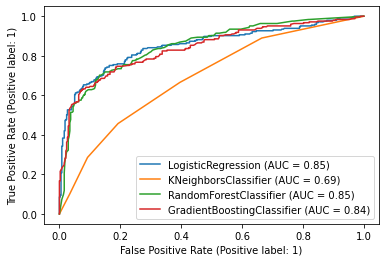

In [59]:
plt.figure(figsize=(10,10,))
graph = plot_roc_curve(Log_reg,X_test, y_test)
plot_roc_curve(KNN_clf,X_test, y_test, ax=graph.ax_)
plot_roc_curve(RF_clf,X_test, y_test,ax=graph.ax_)
plot_roc_curve(GB_clf,X_test, y_test,ax=graph.ax_)
           
plt.show()


## Save the best model

We can see that Logistic regression and Randoforest have same Area under the curve. We are saving the Random Forest Classifier model.

In [63]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Titanic.pkl','wb')

In [65]:
#dump the information to the file
pickle.dump(RF_clf,file)